In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import scipy
import mjoindices.olr_handling as olr
import mjoindices.omi.wheeler_kiladis_mjo_filter

In [8]:
ds = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 3\olr.day.mean.nc')
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 3\olr.mon.mean.nc')
ds

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 73, time: 17501, nmiss: 7)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2022-04-30
Dimensions without coordinates: nmiss
Data variables:
    info     (time, nmiss) float32 ...
    olr      (time, lat, lon) float32 ...
Attributes:
    title:          Daily Mean Interpolated OLR
    description:    Data is interpolated in time and space from NOAA twice-da...
    platform:       Observation
    Conventions:    CF-1.2
    References:     https://www.psl.noaa.gov/data/gridded/data.interp_OLR.html
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.interp_OL...
    NCO:            4.0.0
    Citation:       Liebmann and Smith: June 2006: Description of a Complete ...
    dataset_title:  NOAA Interpolated Outgoing Longwave Radiation (OLR)
    source:         ftp.cpc.ncep.noaa.gov precip/noaa..
    history:        Tue May 10 11:37:33 2005: ncatted -a missing_value,info,o...

In [3]:
#
dsolr = ds.olr
sea_mean = dsolr.loc['1975-01-01':'2021-12-31',30:-31,:].groupby('time.season').mean(dim='time')
sea_ano = dsolr.loc['1975-01-01':'2021-12-31',30:-31,:].groupby('time.season') - sea_mean


print(sea_ano.time)

<xarray.DataArray 'time' (time: 17167)>
array(['1975-01-01T00:00:00.000000000', '1975-01-02T00:00:00.000000000',
       '1975-01-03T00:00:00.000000000', ..., '2021-12-29T00:00:00.000000000',
       '2021-12-30T00:00:00.000000000', '2021-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1975-01-01 1975-01-02 ... 2021-12-31
    season   (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'
Attributes:
    long_name:      Time
    delta_t:        0000-00-01 00:00:00
    standard_name:  time
    axis:           T
    actual_range:   [1528872. 1948872.]


In [6]:
dsa = olr.OLRData(np.nan_to_num(sea_ano.to_numpy()),
                  sea_ano['time'].to_numpy(),
                  sea_ano['lat'].to_numpy(),
                  sea_ano['lon'].to_numpy())
print(dsa)
dsaa = mjoindices.omi.wheeler_kiladis_mjo_filter.filter_olr_temporally_and_longitudinally(dsa,30.,96.,1.,2160,do_plot = True)

SyntaxError: invalid syntax (1358644971.py, line 5)

In [5]:
print(dsaa)
lat = sea_ano['lat']
lon = sea_ano['lon']
time = sea_ano['time']

flt_olr1 = xr.DataArray(dsaa._olr,
coords = {'time' : time, 'lat' : lat, 'lon' : lon},
dims = ["time", "lat", "lon"])
#flt_olr = flt_olr1.squeeze('lat')

#flt_olr = flt_olr1.drop("lat")

flt_olr1.to_netcdf('new1.nc')

NameError: name 'dsaa' is not defined

In [ ]:
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 3\new1.nc')
ds = f.__xarray_dataarray_variable__
print(ds)


In [ ]:
ds.min()
ds.max()

In [ ]:
dsmonth = ds.resample(time ="M").mean(dim="time")
print(dsmonth)

In [ ]:
dsmonth = dsmonth.resample(time='QS-NOV').mean(dim="time")
NDJ=dsmonth[4::4,:,:]
NDJ['time']=NDJ['time.year']
NDJ=NDJ.rename({'time': 'Year'})
NDJ
oni = pd.read_csv('Year_NDJ.txt',delim_whitespace=True,index_col=0)

new_ds = xr.merge([NDJ,oni.to_xarray()],join='inner')
print(new_ds)
Elnino = new_ds['__xarray_dataarray_variable__'].loc[new_ds['NDJ']>0.5].mean(axis=0)
Lanina = new_ds['__xarray_dataarray_variable__'].loc[new_ds['NDJ']<-0.5].mean(axis=0)
lat = new_ds['lat']
lon = new_ds['lon']

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

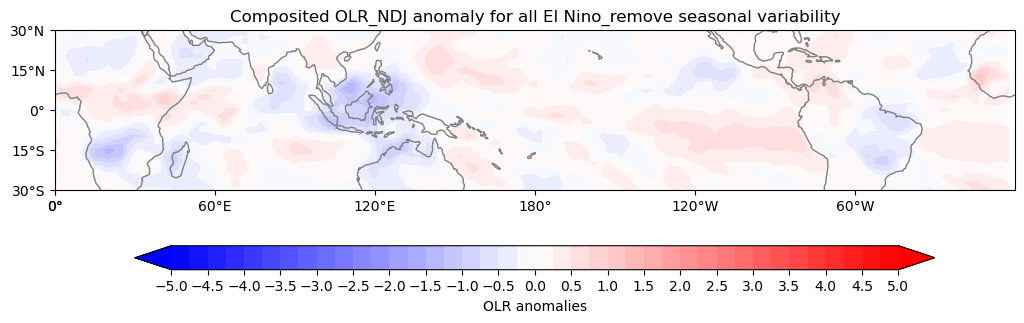

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all El Nino_remove seasonal variability')

c = ax.contourf(lon,lat,Elnino,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

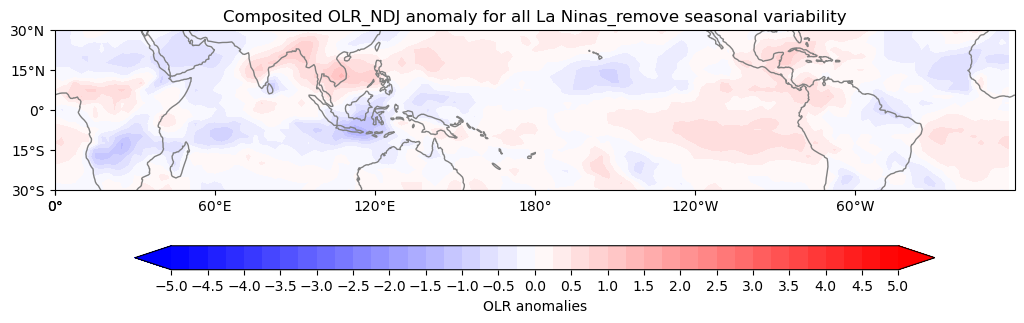

In [36]:
leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all La Ninas_remove seasonal variability')

c = ax.contourf(lon,lat,Lanina,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder=0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.1,0.5),
             shrink=0.7)

In [37]:
sgl= (1983, 1988, 1995, 1998, 2005, 2007, 2010, 2016, 2020)
sgl = np.array(sgl,dtype = 'int32')
sgl =sgl -1975
dbl=(1984, 1999, 2008, 2011, 2017, 2021)
dbl = np.array(dbl,dtype = 'int32')
dbl = dbl -1975
tpl=(1975, 2000)
tpl = np.array(tpl,dtype = 'int32')
tpl = tpl -1975

In [38]:
Lasgl = new_ds.__xarray_dataarray_variable__[sgl,:,:].mean(axis=0)
Ladbl = new_ds.__xarray_dataarray_variable__[dbl,:,:].mean(axis=0)
Latpl = new_ds.__xarray_dataarray_variable__[tpl,:,:].mean(axis=0)

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

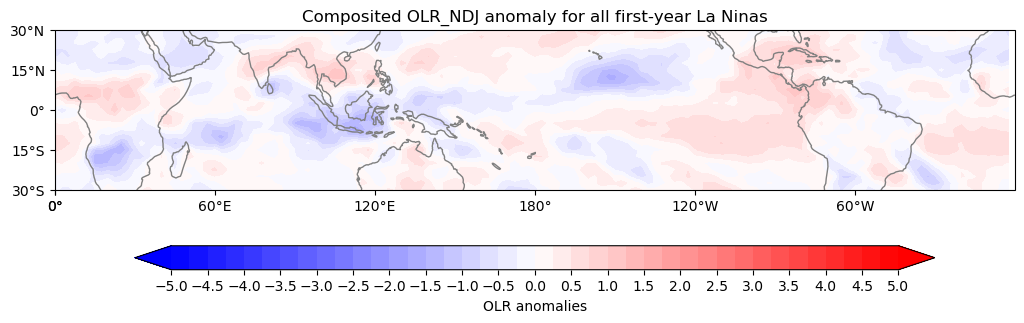

In [39]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all first-year La Ninas')

c = ax.contourf(lon,lat,Lasgl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

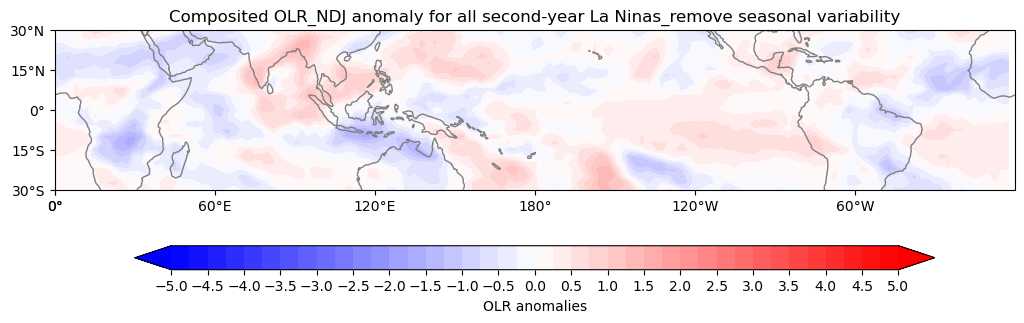

In [40]:
leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all second-year La Ninas_remove seasonal variability')

c = ax.contourf(lon,lat,Ladbl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

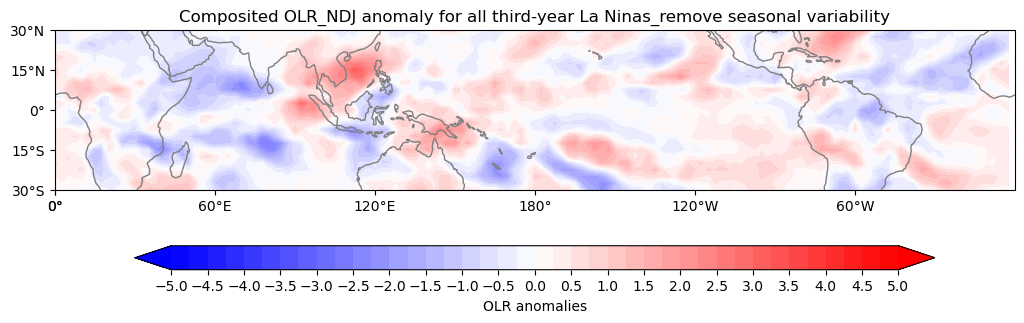

In [41]:
leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all third-year La Ninas_remove seasonal variability')

c = ax.contourf(lon,lat,Latpl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

In [17]:
nor_mean = dsolr.loc['1975-01-01':'2021-12-31',30:-31,:].mean(dim='time')
nor_ano = dsolr.loc['1975-01-01':'2021-12-31',30:-31,:] - nor_mean

Smooth data temporally and longitudinally...
Filtering for latitude:  30.0


C:\Users\lv299\anaconda3\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


Number of elements in filtered spectrum:  216288
Filtering for latitude:  27.5
Number of elements in filtered spectrum:  216288
Filtering for latitude:  25.0
Number of elements in filtered spectrum:  216288
Filtering for latitude:  22.5
Number of elements in filtered spectrum:  216288
Filtering for latitude:  20.0
Number of elements in filtered spectrum:  216288
Filtering for latitude:  17.5
Number of elements in filtered spectrum:  216288
Filtering for latitude:  15.0
Number of elements in filtered spectrum:  216288
Filtering for latitude:  12.5
Number of elements in filtered spectrum:  216288
Filtering for latitude:  10.0
Number of elements in filtered spectrum:  216288
Filtering for latitude:  7.5
Number of elements in filtered spectrum:  216288
Filtering for latitude:  5.0
Number of elements in filtered spectrum:  216288
Filtering for latitude:  2.5
Number of elements in filtered spectrum:  216288
Filtering for latitude:  0.0
Number of elements in filtered spectrum:  216288
Filteri

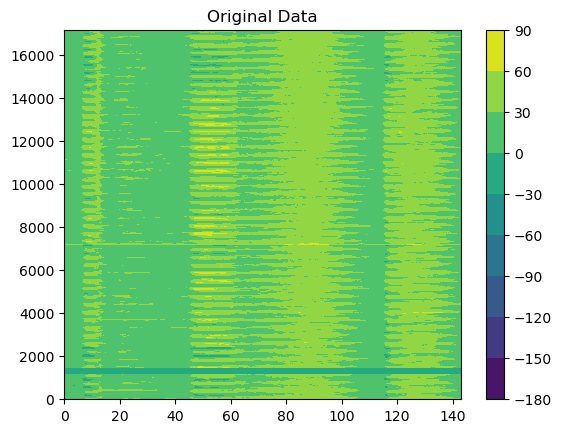

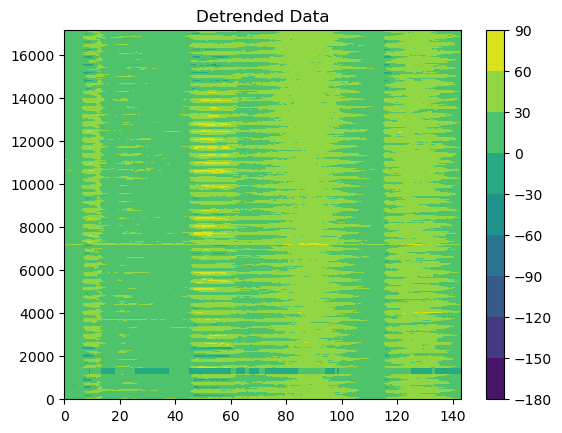

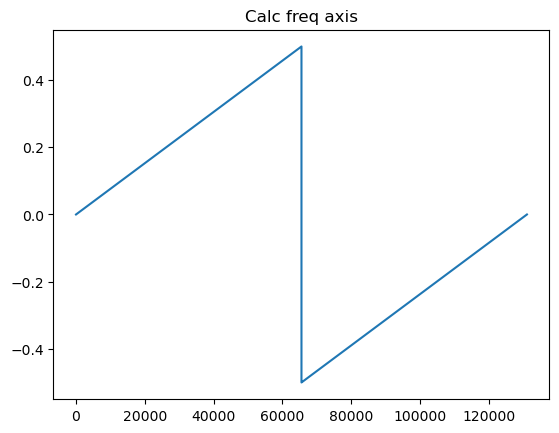

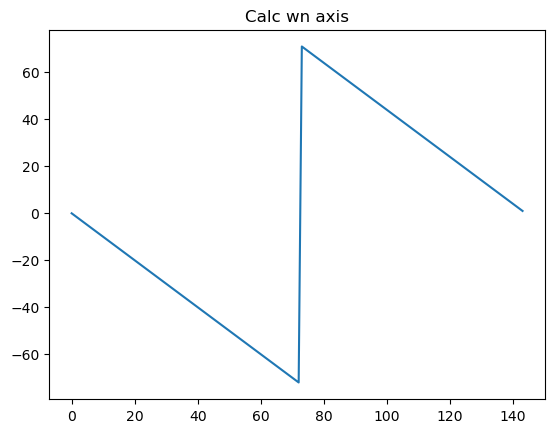

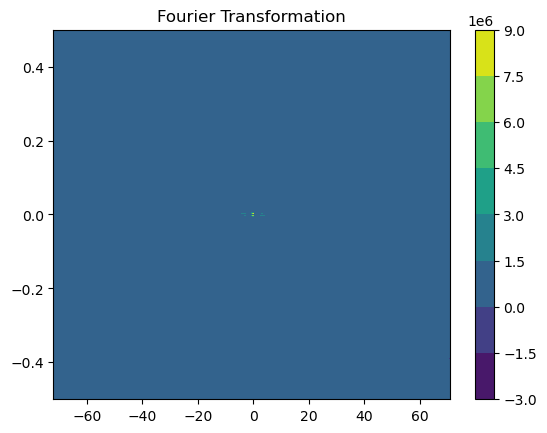

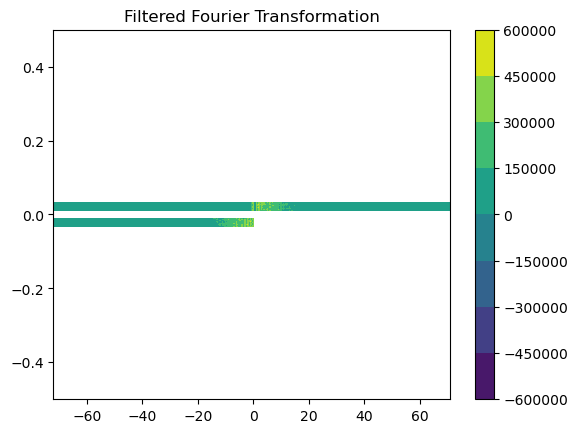

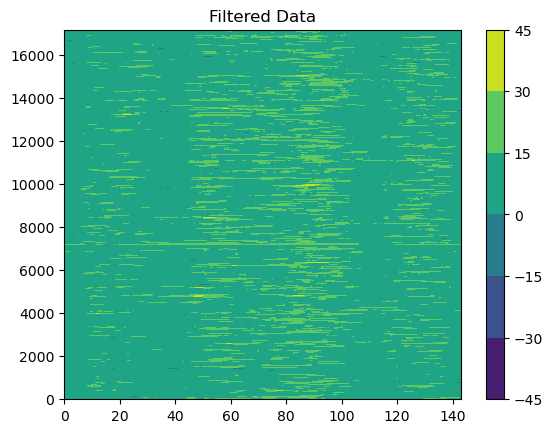

In [18]:
dsa = olr.OLRData(np.nan_to_num(nor_ano.to_numpy()),
                  nor_ano['time'].to_numpy(),
                  nor_ano['lat'].to_numpy(),
                  nor_ano['lon'].to_numpy())
print(dsa)
dsaa = mjoindices.omi.wheeler_kiladis_mjo_filter.filter_olr_temporally_and_longitudinally(dsa,30.,96.,0.,2160,do_plot = True)



In [1]:
dsaa.min()

NameError: name 'dsaa' is not defined

In [43]:
lat = sea_ano['lat']
lon = sea_ano['lon']
time = sea_ano['time']

flt_olr1 = xr.DataArray(dsaa._olr,
coords = {'time' : time, 'lat' : lat, 'lon' : lon},
dims = ["time", "lat", "lon"])
#flt_olr = flt_olr1.squeeze('lat')

#flt_olr = flt_olr1.drop("lat")

flt_olr1.to_netcdf('new2.nc')
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 3\new2.nc')
ds = f.__xarray_dataarray_variable__

In [44]:
dsmonth = ds.resample(time ="M").mean(dim="time")
print(dsmonth)

<xarray.DataArray '__xarray_dataarray_variable__' (time: 564, lat: 25, lon: 144)>
array([[[-5.39476108e+00, -5.36448480e+00, -5.46593359e+00, ...,
         -5.94400697e+00, -5.42601808e+00, -5.02130798e+00],
        [-5.99685560e+00, -5.50432618e+00, -6.67693892e+00, ...,
         -7.17629481e+00, -6.43143146e+00, -5.66105077e+00],
        [-7.16404313e+00, -6.88085088e+00, -6.56790790e+00, ...,
         -6.42435321e+00, -6.41145824e+00, -6.91716572e+00],
        ...,
        [ 4.33356376e-01,  1.88701746e-01,  4.65931608e-01, ...,
          1.98648153e+00,  1.56565087e+00,  8.08803770e-01],
        [ 1.78052584e+00,  9.88427080e-01,  1.35850670e+00, ...,
          2.13565199e+00,  2.02076169e+00,  2.19745442e+00],
        [ 3.45299082e+00,  2.68247908e+00,  1.97126118e+00, ...,
          3.29491052e+00,  3.01245114e+00,  2.74516722e+00]],

       [[ 1.12367587e+00,  6.68798903e-01,  4.92648522e-01, ...,
          1.13561743e+00,  1.50830860e+00,  7.21443292e-01],
        [ 1.63205941e

In [45]:
dsmonth = dsmonth.resample(time='QS-NOV').mean(dim="time")
NDJ=dsmonth[4::4,:,:]
NDJ['time']=NDJ['time.year']
NDJ=NDJ.rename({'time': 'Year'})
NDJ
new_ds = xr.merge([NDJ,oni.to_xarray()],join='inner')
new_ds = xr.merge([NDJ,oni.to_xarray()],join='inner')
print(new_ds)
Elnino = new_ds['__xarray_dataarray_variable__'].loc[new_ds['NDJ']>0.5].mean(axis=0)
Lanina = new_ds['__xarray_dataarray_variable__'].loc[new_ds['NDJ']<-0.5].mean(axis=0)
lat = new_ds['lat']
lon = new_ds['lon']

<xarray.Dataset>
Dimensions:                        (Year: 47, lat: 25, lon: 144)
Coordinates:
  * Year                           (Year) int64 1975 1976 1977 ... 2020 2021
  * lat                            (lat) float32 30.0 27.5 25.0 ... -27.5 -30.0
  * lon                            (lon) float32 0.0 2.5 5.0 ... 355.0 357.5
Data variables:
    __xarray_dataarray_variable__  (Year, lat, lon) float64 0.132 ... 1.031
    NDJ                            (Year) float64 -1.7 0.8 0.8 ... 0.5 -1.2 -1.0


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

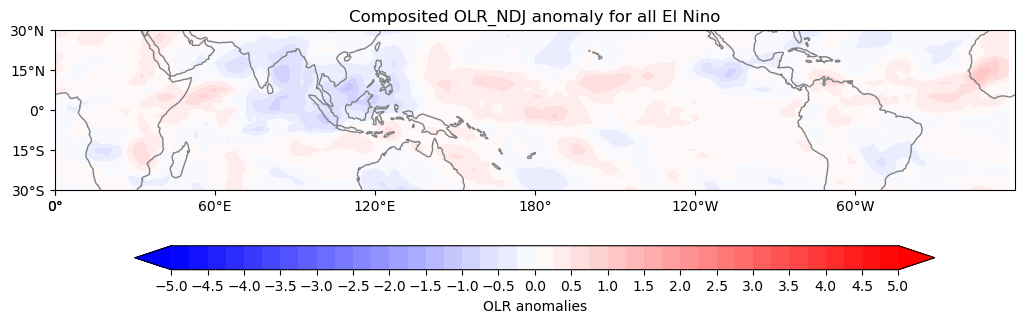

In [46]:
leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all El Nino')

c = ax.contourf(lon,lat,Elnino,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

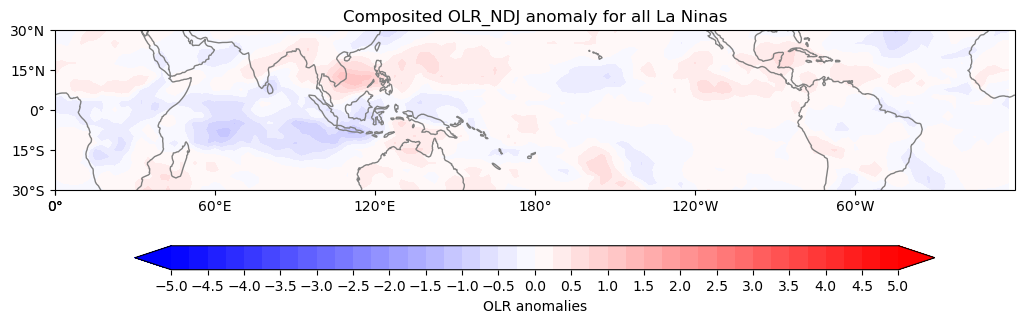

In [52]:
leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all La Ninas')

c = ax.contourf(lon,lat,Lanina,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder=0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.1,0.5),
             shrink=0.7)

In [48]:
Lasgl = new_ds.__xarray_dataarray_variable__[sgl,:,:].mean(axis=0)
Ladbl = new_ds.__xarray_dataarray_variable__[dbl,:,:].mean(axis=0)
Latpl = new_ds.__xarray_dataarray_variable__[tpl,:,:].mean(axis=0)



C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

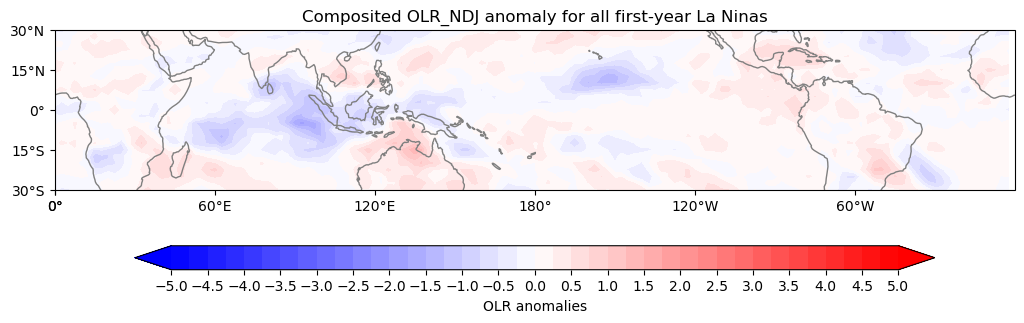

In [49]:
leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all first-year La Ninas')

c = ax.contourf(lon,lat,Lasgl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

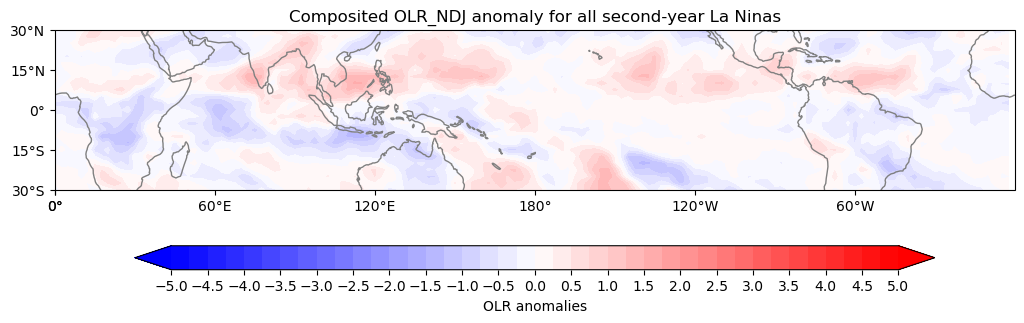

In [53]:
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all second-year La Ninas')

c = ax.contourf(lon,lat,Ladbl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

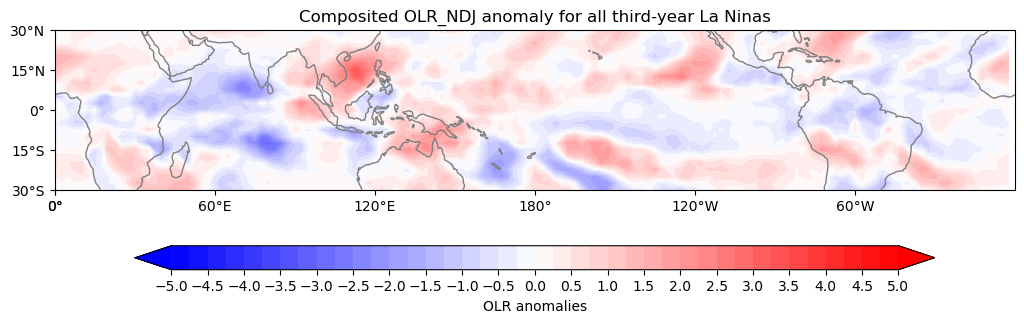

In [54]:
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all third-year La Ninas')

c = ax.contourf(lon,lat,Latpl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)